In [10]:
import glob
import os
import matplotlib.pyplot as plt
import pydicom as pyd
import pandas as pd
import numpy as np
import ddsm_train
from keras.models import load_model
import cv2
from tqdm import tqdm_notebook

In [3]:
import ddsm_train.sample_patches_combined as patch_sampler

In [11]:
#get images
descrip_df = pd.read_csv('/media/haimin/Elements/Descriptions/mass_case_description_train_set.csv')
#descrip_df = pd.read_csv('/media/haimin/Elements/Descriptions/calc_case_description_train_set.csv')

descrip_df.loc[0] #['ROI mask file path']
len(descrip_df['patient_id'])

1318

In [5]:
def find_roi(roi_paths):
    if pyd.dcmread(roi_paths[0]).pixel_array.shape[0] > pyd.dcmread(roi_paths[1]).pixel_array.shape[0]:
        return roi_paths[0]
    else:
        return roi_paths[1]
        
        
row = descrip_df.loc[0]
        
roi_path = glob.glob(work_dir+'/'+row['ROI mask file path'].split('/')[0]+'/*/*/*.dcm')
print find_roi(roi_path)
        

NameError: name 'work_dir' is not defined

In [26]:
row = descrip_df.loc[a]
folder = row['image file path'].split('/')[0]
image_path = glob.glob(work_dir+'/'+row['image file path'].split('/')[0]+'/*/*/*.dcm')[0]
print image_path
img = pyd.dcmread(image_path).pixel_array
roi_path = find_roi(glob.glob(work_dir+'/'+row['ROI mask file path'].split('/')[0]+'/*/*/*.dcm'))
#roi_path = glob.glob(work_dir+'/'+row['ROI mask file path'].split('/')[0]+'/*/*/*.dcm')

print roi_path
roi_mask = pyd.dcmread(roi_path).pixel_array
img_id = row['patient_id']
print img_id
#abn = row['abnormality type'][:4]
abn = 1

print abn
pos = True if row['pathology'] == 'MALIGNANT' else False
print pos
patch_sampler.sample_patches(img, roi_mask, 
                                 output_dir,
                                 img_id, abn, pos,
                                 nb_bkg = 3, nb_abn = 2,
                                 verbose=True)


/media/haimin/Elements/CBIS-DDSM/Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM-23157/1-full mammogram images-38548/000000.dcm
/media/haimin/Elements/CBIS-DDSM/Calc-Training_P_00005_RIGHT_CC_1/08-30-2017-DDSM-09081/1-cropped images-94682/000000.dcm
P_00005
1
True
saving in npy
ROI centroid= (2030, 3070)
sampled an abn patch at (x,y) center= (1998, 2926)
sampled an abn patch at (x,y) center= (2133, 3222)
sampled an abn patch at (x,y) center= (2095, 3154)
sampled an abn patch at (x,y) center= (1831, 3166)
sampled an abn patch at (x,y) center= (2028, 2902)
sampled an abn patch at (x,y) center= (1921, 3064)
sampled an abn patch at (x,y) center= (1879, 3060)
sampled an abn patch at (x,y) center= (2152, 3084)
sampled an abn patch at (x,y) center= (1837, 2940)
sampled an abn patch at (x,y) center= (2050, 2904)
sampled a bkg patch at (x,y) center= (2565, 1461)
sampled a bkg patch at (x,y) center= (2547, 1224)
sampled a bkg patch at (x,y) center= (2181, 4450)
sampled a bkg patch at (x,y) center

In [12]:
work_dir = '/media/haimin/Elements/CBIS-DDSM'

output_dir = '/home/haimin/Dicom/cbis-ddsm/patches/output_mass'
a = 0
for i in tqdm_notebook(range(a,len(descrip_df['patient_id']))):
    row = descrip_df.loc[i]
    folder = row['image file path'].split('/')[0]
    image_path = glob.glob(work_dir+'/'+row['image file path'].split('/')[0]+'/*/*/*.dcm')[0]
    img = pyd.dcmread(image_path).pixel_array
    roi_path = find_roi(glob.glob(work_dir+'/'+row['ROI mask file path'].split('/')[0]+'/*/*/*.dcm'))
    roi_mask = pyd.dcmread(roi_path).pixel_array
    img_id = row['patient_id']
    abn = row['abnormality type'][:4]
    pos = True if row['pathology'] == 'MALIGNANT' else False
    
    patch_sampler.sample_patches(img, roi_mask, 
                                 output_dir,
                                 img_id, abn, pos,
                                 nb_bkg = 3, nb_abn = 2,
                                 verbose=False)


Nb of trials reached maximum, decrease overlap cutoff by 0.05
Nb of trials reached maximum, decrease overlap cutoff by 0.05
Nb of trials reached maximum, decrease overlap cutoff by 0.05
Nb of trials reached maximum, decrease overlap cutoff by 0.05
Nb of trials reached maximum, decrease overlap cutoff by 0.05
Nb of trials reached maximum, decrease overlap cutoff by 0.05



In [ ]:
make_patches = patch_sampler.sample_patches(img, roi_mask, output_dir,
                                            'P_00038', 'calc', pos = False,
                                            nb_bkg = 15, nb_abn = 15,
                                            verbose=True)



In [10]:
# load np array from path
#npy_paths = glob.glob('/home/haimin/Dicom/cbis-ddsm/patches/output/background/'+'*.npy')
npy_paths = glob.glob('/home/haimin/Dicom/cbis-ddsm/patches/output/*/'+'*.npy')

print len(npy_paths)
for img in npy_paths:
    
    arr = np.load(img)
    #print arr.shape

20


In [15]:
npy_paths[11].split('/')[7]

'background'

In [18]:

def make_predictition(image, model_path):
    print image, '\n'*2
    image = pyd.dcmread(image).pixel_array
    scale = np.amax(image)/255
    image = image/scale
    image = cv2.resize(image, (896, 1152), interpolation=cv2.INTER_AREA)
    image = np.expand_dims(image, -1)
    image = np.expand_dims(image, 0)
    model = load_model(model_path)
    res = model.predict(image)
    print res, '\n'
    return res

paths = glob.glob('/home/haimin/Dicom/cbis-ddsm/'+'*/'+'Mass*/'+'*/'*2+'*.dcm')
len(paths)

6

In [ ]:
for img in paths:
    make_predictition(img, model_path=model_path)

In [5]:
work_dir = '/media/haimin/Elements/CBIS-DDSM'

def get_roi_fps(work_dir):
    roi_fps = glob.glob(work_dir + ('/' + '*')*2 + '/' + '*-ROI *' + '/' + '*1.dcm')

    
    return list(roi_fps)

In [6]:
roi_fps =get_roi_fps(work_dir)
#len(l1)
roi_fps[0:3]

['/media/haimin/Elements/CBIS-DDSM/Calc-Training_P_01002_LEFT_MLO_1/09-06-2017-DDSM-60186/1-ROI mask images-01279/000001.dcm',
 '/media/haimin/Elements/CBIS-DDSM/Calc-Test_P_00038_RIGHT_CC_2/08-29-2017-DDSM-67143/1-ROI mask images-07570/000001.dcm',
 '/media/haimin/Elements/CBIS-DDSM/Calc-Test_P_00038_RIGHT_MLO_1/08-29-2017-DDSM-65172/1-ROI mask images-21714/000001.dcm']

In [31]:
roi_mask_path_df = pd.DataFrame(roi_fps)
#roi_mask_path_df.head()
df = roi_mask_path_df[0].str.split('/', expand=True)
df['patient_id'] = df[5].str.split('_', expand=True)[2]
df['side'] = df[5].str.split('_', expand=True)[3]
df['view'] = df[5].str.split('_', expand=True)[4]
df['path'] = roi_fps
df.drop([0, 1, 2, 3, 4, 5, 6, 7, 8], axis=1, inplace=True)


df.head()

,patient_id,side,view,path
0,01002,LEFT,MLO,/media/haimin/Elements/CBIS-DDSM/Calc-Training...
1,00038,RIGHT,CC,/media/haimin/Elements/CBIS-DDSM/Calc-Test_P_0...
2,00038,RIGHT,MLO,/media/haimin/Elements/CBIS-DDSM/Calc-Test_P_0...
3,00038,RIGHT,MLO,/media/haimin/Elements/CBIS-DDSM/Calc-Test_P_0...
4,00041,LEFT,CC,/media/haimin/Elements/CBIS-DDSM/Calc-Test_P_0...


In [32]:
df.to_csv('/media/haimin/Elements/roi_mask_path_file.csv', index=None)

In [52]:
#df = pd.read_csv('/media/haimin/Elements/roi_mask_path_file.csv')
df = pd.read_csv('/media/haimin/Elements/Descriptions/calc_case_description_train_set.csv')
df = df.set_index(['patient_id', 'left or right breast', 'image view'])


df.head()

breast density  abnormality id  \
patient_id left or right breast image view                                   
P_00005    RIGHT                CC                       3               1   
                                MLO                      3               1   
P_00007    LEFT                 CC                       4               1   
                                MLO                      4               1   
P_00008    LEFT                 CC                       1               1   

                                           abnormality type    calc type  \
patient_id left or right breast image view                                 
P_00005    RIGHT                CC            calcification    AMORPHOUS   
                                MLO           calcification    AMORPHOUS   
P_00007    LEFT                 CC            calcification  PLEOMORPHIC   
                                MLO           calcification  PLEOMORPHIC   
P_00008    LEFT                 CC            calcification          NaN   

                                           calc distribution  assessment  \
patient_id left or right breast image view                                 
P_00005    RIGHT                CC                 CLUSTERED           3   
                                MLO                CLUSTERED           3   
P_00007    LEFT                 CC                    LINEAR           4   
                                MLO                   LINEAR           4   
P_00008    LEFT                 CC                  REGIONAL           2   

                                                          pathology  subtlety  \
patient_id left or right breast image view                                      
P_00005    RIGHT                CC                        MALIGNANT         3   
                                MLO                       MALIGNANT         3   
P_00007    LEFT                 CC                           BENIGN         4   
                                MLO                          BENIGN         4   
P_00008    LEFT                 CC          BENIGN_WITHOUT_CALLBACK         3   

                                                                              image file path  \
patient_id left or right breast image view                                                      
P_00005    RIGHT                CC          Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
                                MLO         Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
P_00007    LEFT                 CC          Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
                                MLO         Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
P_00008    LEFT                 CC          Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                                                                      cropped image file path  \
patient_id left or right breast image view                                                      
P_00005    RIGHT                CC          Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
                                MLO         Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
P_00007    LEFT                 CC          Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
                                MLO         Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
P_00008    LEFT                 CC          Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                                                           ROI mask file path  
patient_id left or right breast image view                                                     
P_00005    RIGHT                CC          Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
                                MLO         Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
P_00007    LEFT                 CC          Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
                       

In [47]:
pat_train_list_file = '/media/haimin/Elements/Descriptions/calc_case_description_train_set.csv'
pat_train = pd.read_csv(pat_train_list_file)
pat_train = pat_train['patient_id'].values.ravel()
#pat_train['patient_id']

In [54]:
path_df = df.loc[pat_train.tolist()]
path_df.head()

breast density  abnormality id  \
patient_id left or right breast image view                                   
P_00005    RIGHT                CC                       3               1   
                                MLO                      3               1   
P_00007    LEFT                 CC                       4               1   
                                MLO                      4               1   
P_00008    LEFT                 CC                       1               1   

                                           abnormality type    calc type  \
patient_id left or right breast image view                                 
P_00005    RIGHT                CC            calcification    AMORPHOUS   
                                MLO           calcification    AMORPHOUS   
P_00007    LEFT                 CC            calcification  PLEOMORPHIC   
                                MLO           calcification  PLEOMORPHIC   
P_00008    LEFT                 CC            calcification          NaN   

                                           calc distribution  assessment  \
patient_id left or right breast image view                                 
P_00005    RIGHT                CC                 CLUSTERED           3   
                                MLO                CLUSTERED           3   
P_00007    LEFT                 CC                    LINEAR           4   
                                MLO                   LINEAR           4   
P_00008    LEFT                 CC                  REGIONAL           2   

                                                          pathology  subtlety  \
patient_id left or right breast image view                                      
P_00005    RIGHT                CC                        MALIGNANT         3   
                                MLO                       MALIGNANT         3   
P_00007    LEFT                 CC                           BENIGN         4   
                                MLO                          BENIGN         4   
P_00008    LEFT                 CC          BENIGN_WITHOUT_CALLBACK         3   

                                                                              image file path  \
patient_id left or right breast image view                                                      
P_00005    RIGHT                CC          Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
                                MLO         Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
P_00007    LEFT                 CC          Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
                                MLO         Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
P_00008    LEFT                 CC          Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                                                                      cropped image file path  \
patient_id left or right breast image view                                                      
P_00005    RIGHT                CC          Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
                                MLO         Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
P_00007    LEFT                 CC          Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
                                MLO         Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
P_00008    LEFT                 CC          Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                                                           ROI mask file path  
patient_id left or right breast image view                                                     
P_00005    RIGHT                CC          Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
                                MLO         Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
P_00007    LEFT                 CC          Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
                       

In [217]:
#len(pat_df['pathology'])
pat_df.head(2)


breast density  abnormality id  \
patient_id left or right breast image view                                   
P_00038    LEFT                 CC                       2               1   
                                MLO                      2               1   

                                           abnormality type  \
patient_id left or right breast image view                    
P_00038    LEFT                 CC            calcification   
                                MLO           calcification   

                                                       calc type  \
patient_id left or right breast image view                         
P_00038    LEFT                 CC          PUNCTATE-PLEOMORPHIC   
                                MLO         PUNCTATE-PLEOMORPHIC   

                                           calc distribution  assessment  \
patient_id left or right breast image view                                 
P_00038    LEFT                 CC                 CLUSTERED           4   
                                MLO                CLUSTERED           4   

                                           pathology  subtlety  \
patient_id left or right breast image view                       
P_00038    LEFT                 CC            BENIGN         2   
                                MLO           BENIGN         2   

                                                                              image file path  \
patient_id left or right breast image view                                                      
P_00038    LEFT                 CC          Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...   
                                MLO         Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...   

                                                                      cropped image file path  \
patient_id left or right breast image view                                                      
P_00038    LEFT                 CC          Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
                                MLO         Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....   

                                                                           ROI mask file path  
patient_id left or right breast image view                                                     
P_00038    LEFT                 CC          Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
                                MLO         Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....

In [256]:
pat = pd.read_csv('/home/haimin/Dicom/CBIS-DDSM/calc_case_description_test_set.csv', header=None) #read all info to one df
#pat.drop(['breast density', 'abnormality id'], axis=1, inplace=True)
pat.drop(pat.columns[4:-1], axis=1, inplace=True)
pat.drop(pat.columns[[1, 4]], axis=1, inplace=True)
pat.to_csv('/home/haimin/Dicom/CBIS-DDSM/pat_list.csv')
pat.head(2)


,0,2,3
0,patient_id,left or right breast,image view
1,P_00038,LEFT,CC


In [255]:
pat_train = pd.read_csv('/home/haimin/Dicom/CBIS-DDSM/pat_list.csv', header=None) #read all info to one df

pat_train.drop(pat_train.columns[[0, 2, 3]], axis=1, inplace=True)

pat_train = pat_train.values.ravel()
print(len(pat_train))
path_df = rois_df.loc[pat_train.tolist()]

pat_train


327


array([nan, 'P_00038', 'P_00038', 'P_00038', 'P_00038', 'P_00038',
       'P_00038', 'P_00041', 'P_00041', 'P_00077', 'P_00077', 'P_00077',
       'P_00077', 'P_00077', 'P_00077', 'P_00100', 'P_00100', 'P_00127',
       'P_00127', 'P_00132', 'P_00140', 'P_00140', 'P_00140', 'P_00140',
       'P_00140', 'P_00140', 'P_00140', 'P_00140', 'P_00141', 'P_00141',
       'P_00150', 'P_00163', 'P_00163', 'P_00164', 'P_00180', 'P_00180',
       'P_00195', 'P_00195', 'P_00202', 'P_00202', 'P_00214', 'P_00214',
       'P_00214', 'P_00214', 'P_00214', 'P_00223', 'P_00244', 'P_00246',
       'P_00257', 'P_00257', 'P_00299', 'P_00299', 'P_00299', 'P_00315',
       'P_00325', 'P_00331', 'P_00331', 'P_00344', 'P_00344', 'P_00352',
       'P_00352', 'P_00353', 'P_00353', 'P_00353', 'P_00353', 'P_00368',
       'P_00368', 'P_00372', 'P_00372', 'P_00390', 'P_00390', 'P_00397',
       'P_00402', 'P_00402', 'P_00403', 'P_00403', 'P_00460', 'P_00460',
       'P_00466', 'P_00485', 'P_00485', 'P_00485', 'P_004

In [259]:
for pat in pat_train[1:]:
    pathology = pat_df.loc[pat]['pathology']
    print(pathology)



left or right breast  image view
LEFT                  CC                             BENIGN
                      MLO                            BENIGN
RIGHT                 CC            BENIGN_WITHOUT_CALLBACK
                      CC            BENIGN_WITHOUT_CALLBACK
                      MLO           BENIGN_WITHOUT_CALLBACK
                      MLO           BENIGN_WITHOUT_CALLBACK
Name: pathology, dtype: object
left or right breast  image view
LEFT                  CC                             BENIGN
                      MLO                            BENIGN
RIGHT                 CC            BENIGN_WITHOUT_CALLBACK
                      CC            BENIGN_WITHOUT_CALLBACK
                      MLO           BENIGN_WITHOUT_CALLBACK
                      MLO           BENIGN_WITHOUT_CALLBACK
Name: pathology, dtype: object
left or right breast  image view
LEFT                  CC                             BENIGN
                      MLO                            BENIGN

KeyError: u'the label [P_00141] is not in the [index]'

In [111]:
pat_ids = ['P_'+i.split('/')[5].split('_')[2] for i in roi_fps]
side = [i.split('/')[5].split('_')[3] for i in roi_fps]
view = [i.split('/')[5].split('_')[4] for i in roi_fps]

#pat_ids[0:3]
view[0:3]

['MLO', 'CC', 'MLO']

In [216]:
#rois_df.to_csv('/home/haimin/Dicom/CBIS-DDSM/rois_paths.csv')
rois_df5 = pd.read_csv('/home/haimin/Dicom/CBIS-DDSM/rois_paths.csv')
rois_df5.head(3)

,patient_id,side,view,ROI mask file path,pathology
0,P_00038,LEFT,CC,/home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00038...,BENIGN
1,P_00038,LEFT,MLO,/home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00038...,BENIGN
2,P_00038,RIGHT,CC,/home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00038...,BENIGN_WITHOUT_CALLBACK


In [134]:
path_df

ROI mask file path
patient_id side  view                                                   
P_00140    LEFT  MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00140...
P_00038    RIGHT CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00038...
P_00041    LEFT  MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00041...
P_00140    LEFT  CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00140...
                 CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00140...
P_00038    RIGHT CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00038...
P_00140    LEFT  MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00140...
P_00132    LEFT  MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00132...
P_00077    LEFT  MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00077...
           RIGHT CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00077...
                 MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00077...
P_00038    LEFT  CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00038...
P_00140    RIGHT CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00140...
P_00100    RIGHT CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00100...
P_00127    RIGHT CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00127...
P_00038    LEFT  MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00038...
           RIGHT MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00038...
P_00077    RIGHT MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00077...
P_00038    RIGHT MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00038...
P_00100    RIGHT MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00100...
P_00077    RIGHT CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00077...
P_00041    LEFT  CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00041...
P_00127    RIGHT MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00127...
P_00140    RIGHT MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00140...
P_00077    LEFT  CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00077...
P_00140    RIGHT CC    /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00140...
                 MLO   /home/haimin/Dicom/CBIS-DDSM/Calc-Test_P_00140...

In [135]:
pat_train.head(3)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

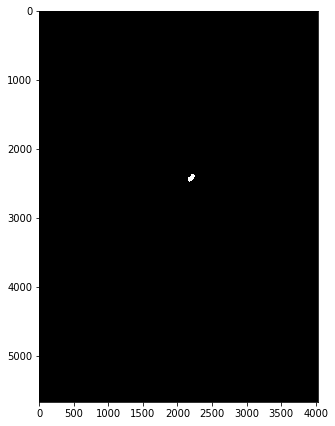

In [73]:
plt.figure(figsize=(5,10))
plt.imshow(pyd.dcmread(l1[2]).pixel_array, cmap=plt.cm.bone)

In [100]:
info_df = pd.read_csv('/home/haimin/Dicom/CBIS-DDSM/calc_case_description_test_set.csv') #read all info to one df
#info_df.filter('patient_id', axis=1)
#info_df = info_df.set_index('patient_id')
info_df.head(2)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....


In [106]:
#info_df.loc[pat_ids[21], 'pathology']
#pat_train = info_df['patient_id'].values.ravel()
pat_train = info_df['patient_id']

rois_df.loc[pat_train.tolist()]


/home/haimin/PycharmProjects/end2end-all-conv/venv/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


{'ROI mask file path'}

In [ ]:
path_df = roi_mask_path_df.loc[pat_train.tolist()]
